In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
df = pd.read_csv("/content/Final_Data_update.csv")
df.sample(5)

,Year,District,Area_,Area,Production_,Production,Yield_(tonnes/ha),NDVI,EVI,FAPAR,GPP,LAI,Rainfall,Temperature,SMI
52,2010,Rajkot,"3,06,200.00",3.06,"6,24,300.00",62.43,2.04,0.395073,0.265852,2.730903,12.628797,0.580709,58.791410,259.409928,8.310620
90,2018,Jamnagar,"1,30,381.00",1.30,"1,53,818.00",15.38,1.18,0.315591,0.202166,2.432149,13.173069,0.507552,53.799029,260.545185,13.509504
43,2008,Amreli,"2,48,100.00",2.48,"1,15,400.00",11.54,0.47,0.415321,0.283919,2.809569,13.959410,0.611284,61.553972,255.450975,8.357046
51,2010,Junagadh,"4,02,100.00",4.02,"8,85,300.00",88.53,2.20,0.429353,0.306017,3.178018,17.657363,0.716806,75.491077,247.339524,7.129536
107,2021,Rajkot,"2,71,007.00",2.71,"5,55,011.00",55.50,2.05,0.413451,0.266836,2.730903,12.628797,0.580709,58.791410,259.409928,8.310620


In [ ]:
df.shape

(110, 15)

In [ ]:
df.columns

Index(['Year', 'District', 'Area_', 'Area', 'Production_', 'Production',
       'Yield_(tonnes/ha)', 'NDVI', 'EVI', 'FAPAR', 'GPP', 'LAI', 'Rainfall',
       'Temperature', 'SMI'],
      dtype='object')

In [ ]:
df = df.drop("Area_", axis=1)

In [ ]:
df = df.drop("Production_", axis=1)

In [ ]:
numerical = df.select_dtypes(include=["int", "float"])

In [ ]:
df_numerical = pd.DataFrame(numerical)
df_numerical.head()

,Year,Area,Production,Yield_(tonnes/ha),NDVI,EVI,FAPAR,GPP,LAI,Rainfall,Temperature,SMI
0,2000,3.91,0.91,0.02,0.279311,0.185789,2.432149,13.173069,0.507552,53.799029,260.545185,13.509504
1,2000,4.06,41.48,1.02,0.362143,0.242622,3.178018,17.657363,0.716806,75.491077,247.339524,7.129536
2,2000,3.81,2.16,0.06,0.283901,0.179621,2.730903,12.628797,0.580709,58.791410,259.409928,8.310620
3,2000,2.48,4.21,0.17,0.270095,0.164502,2.809569,13.959410,0.611284,61.553972,255.450975,8.357046
4,2000,1.46,1.31,0.09,0.272157,0.172519,2.750900,13.137282,0.588492,64.480657,252.555656,7.433608


In [ ]:
df_numerical.corr()

,Year,Area,Production,Yield_(tonnes/ha),NDVI,EVI,FAPAR,GPP,LAI,Rainfall,Temperature,SMI
Year,1.000000e+00,-0.524191,-0.008389,0.430776,0.356447,0.259767,2.563615e-15,-1.194923e-15,7.064895e-17,-1.929236e-15,-4.139146e-17,4.390124e-16
Area,-5.241907e-01,1.000000,0.537603,-0.106882,-0.004436,0.071298,1.381353e-01,2.770594e-01,1.491532e-01,6.393068e-02,7.389554e-02,1.553900e-01
Production,-8.389075e-03,0.537603,1.000000,0.701395,0.438330,0.523469,1.454471e-01,2.736771e-01,1.561524e-01,1.252117e-01,-4.167075e-02,9.411860e-02
Yield_(tonnes/ha),4.307757e-01,-0.106882,0.701395,1.000000,0.540551,0.567718,1.096581e-02,6.938077e-02,1.495869e-02,4.428831e-02,-4.684835e-02,4.658768e-02
NDVI,3.564466e-01,-0.004436,0.438330,0.540551,1.000000,0.974191,4.938919e-01,4.304352e-01,4.969318e-01,4.727727e-01,-4.534724e-01,-3.910564e-01
EVI,2.597673e-01,0.071298,0.523469,0.567718,0.974191,1.000000,5.289337e-01,5.031817e-01,5.353577e-01,5.266492e-01,-5.075875e-01,-3.783005e-01
FAPAR,2.563615e-15,0.138135,0.145447,0.010966,0.493892,0.528934,1.000000e+00,8.449018e-01,9.978561e-01,9.612313e-01,-8.947194e-01,-8.116778e-01
GPP,-1.194923e-15,0.277059,0.273677,0.069381,0.430435,0.503182,8.449018e-01,1.000000e+00,8.752019e-01,8.770930e-01,-8.367502e-01,-3.867457e-01
LAI,7.064895e-17,0.149153,0.156152,0.014959,0.496932,0.535358,9.978561e-01,8.752019e-01,1.000000e+00,9.635767e-01,-9.008845e-01,-7.761713e-01
Rainfall,-1.929236e-15,0.063931,0.125212,0.044288,0.472773,0.526649,9.612313e-01,8.770930e-01,9.635767e-01,1.000000e+00,-9.752740e-01,-7.506678e-01


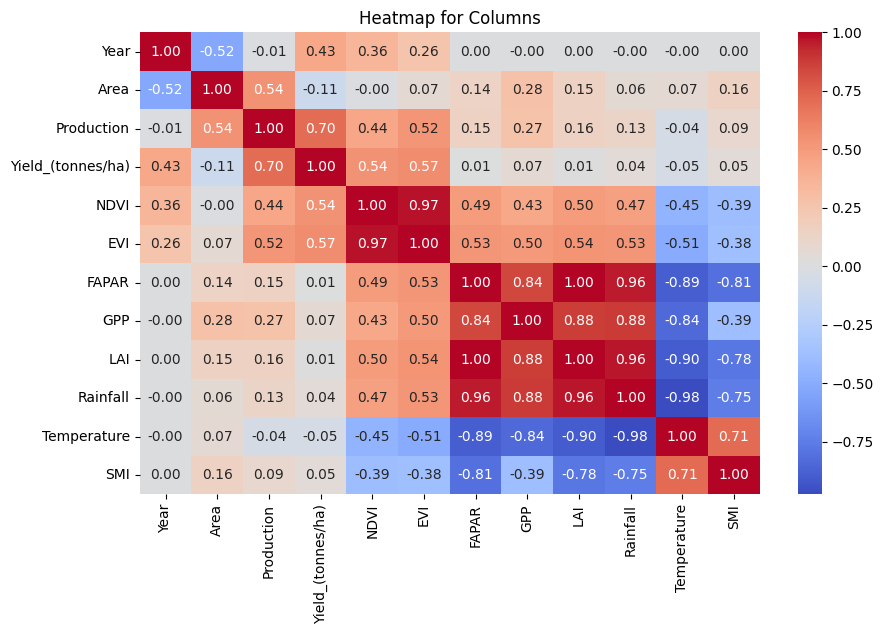

In [ ]:
# Function for creating Heat map:
def create_heatmap(data):
    plt.figure(figsize=(10,6))
    sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Heatmap for Columns')
    plt.show()

create_heatmap(df_numerical)

In [ ]:
# Extract the "Year" and "Production" columns
Year = df["Year"]
Area = df["Area"]

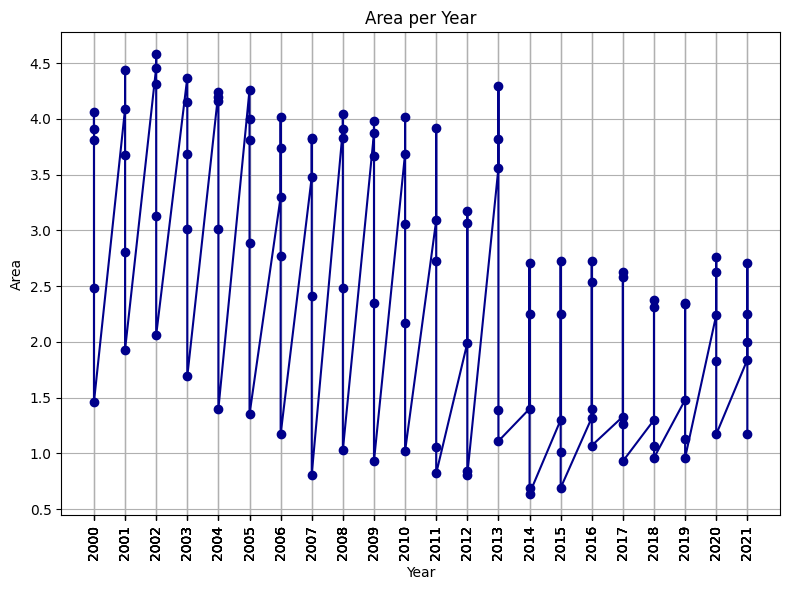

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
plt.plot(Year, Area, marker='o', linestyle='-', color = 'darkblue')
plt.title('Area per Year')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Area')
plt.grid(True)
plt.xticks(Year)  # Set x-axis ticks to display all years
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
# Extract the "Year" and "Production" columns
Year = df["Year"]
Production = df["Production"]

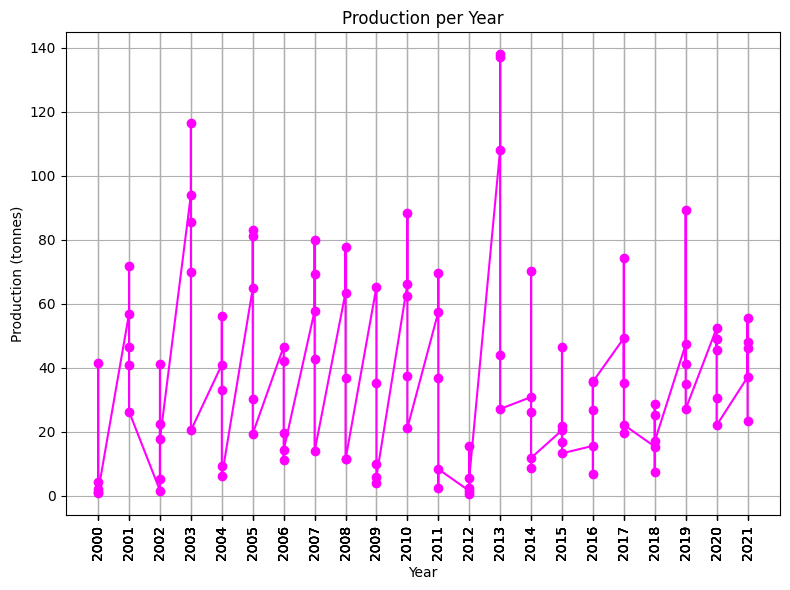

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
plt.plot(Year, Production, marker='o', linestyle='-', color = 'magenta')
plt.title('Production per Year')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Production (tonnes)')
plt.grid(True)
plt.xticks(Year)  # Set x-axis ticks to display all years
plt.tight_layout()

# Show plot
plt.show()

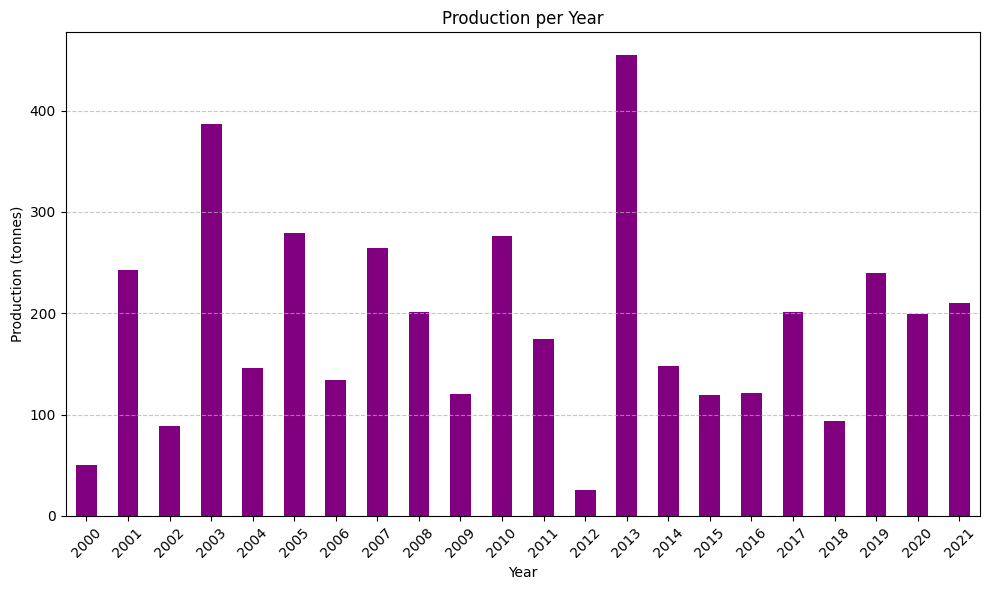

In [ ]:
# Group by year and sum the production
production_per_year = df.groupby('Year')['Production'].sum()

# Plot
plt.figure(figsize=(10, 6))
production_per_year.plot(kind='bar', color='purple')
plt.title('Production per Year')
plt.xlabel('Year')
plt.ylabel('Production (tonnes)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

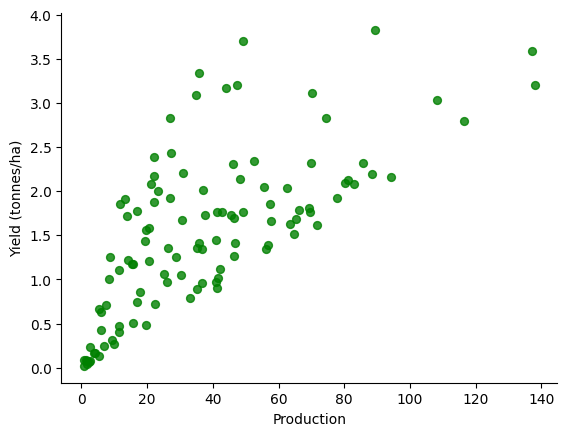

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(df_numerical['Production'], df_numerical['Yield_(tonnes/ha)'], s=32, alpha=0.8, color = 'green')

# Adjusting spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Axes labels
plt.xlabel('Production')
plt.ylabel('Yield (tonnes/ha)')

# Show the plot
plt.show()


In [ ]:
categorical_features = ['Year', 'District']
numerical_features = ['Area', 'Production', 'NDVI', 'EVI', 'LAI','FAPAR','GPP','Rainfall','Temperature','SMI']


In [ ]:
df_copy = df
df_copy.sample(5)

,Year,District,Area,Production,Yield_(tonnes/ha),NDVI,EVI,FAPAR,GPP,LAI,Rainfall,Temperature,SMI
54,2010,Bhavnagar,1.02,21.17,2.08,0.399904,0.278096,2.750900,13.137282,0.588492,64.480657,252.555656,7.433608
70,2014,Jamnagar,1.40,30.86,2.21,0.341332,0.226503,2.432149,13.173069,0.507552,53.799029,260.545185,13.509504
91,2018,Junagadh,2.31,28.76,1.25,0.383636,0.258546,3.178018,17.657363,0.716806,75.491077,247.339524,7.129536
9,2001,Bhavnagar,1.93,26.34,1.36,0.379380,0.268815,2.750900,13.137282,0.588492,64.480657,252.555656,7.433608
2,2000,Rajkot,3.81,2.16,0.06,0.283901,0.179621,2.730903,12.628797,0.580709,58.791410,259.409928,8.310620


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
df_copy[categorical_features] = df_copy[categorical_features].apply(lambda col: label_encoder.fit_transform(col))

In [ ]:
df_copy.sample(5)

,Year,District,Area,Production,Yield_(tonnes/ha),NDVI,EVI,FAPAR,GPP,LAI,Rainfall,Temperature,SMI
0,0,2,3.91,0.91,0.02,0.279311,0.185789,2.432149,13.173069,0.507552,53.799029,260.545185,13.509504
49,9,1,0.93,5.92,0.63,0.352951,0.231726,2.750900,13.137282,0.588492,64.480657,252.555656,7.433608
66,13,3,3.82,137.08,3.59,0.468189,0.333708,3.178018,17.657363,0.716806,75.491077,247.339524,7.129536
30,6,2,3.30,46.62,1.41,0.332466,0.225746,2.432149,13.173069,0.507552,53.799029,260.545185,13.509504
98,19,0,1.13,34.92,3.09,0.439715,0.291450,2.809569,13.959410,0.611284,61.553972,255.450975,8.357046


In [ ]:
X = df_copy.drop(columns=['Yield_(tonnes/ha)'])
y = df_copy['Yield_(tonnes/ha)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create different Regression models:
Linear_regression = LinearRegression()
Ridge_Regression =  Ridge()
Lasso_Regression =  Lasso(alpha = 0.1)
Decision_Tree =  DecisionTreeRegressor()
Random_Forest = RandomForestRegressor()
Gradient_Boosting = GradientBoostingRegressor()
AdaBoost = AdaBoostRegressor()
XGBoost = XGBRegressor()
svr = SVR()

In [ ]:
model_list = [Linear_regression, Ridge_Regression, Lasso_Regression, Decision_Tree, Random_Forest, Gradient_Boosting, AdaBoost, XGBoost, svr]

In [ ]:
model_name = ["Linear regression", "Ridge Regression", "Lasso Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "AdaBoost", "XGBoost", "svr"]

In [ ]:
# Creating list of accuracy of all the models and selecting best model with highest accuracy:
accuracy_list = []
for model in model_list:
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  accuracy = r2_score(y_test, y_pred)
  accuracy_list.append(accuracy)

In [ ]:
# Creating dataframe of model with their respective accuracy:
model_df = pd.DataFrame({"Model": model_name, "Accuracy": accuracy_list})
model_df

,Model,Accuracy
0,Linear regression,0.749976
1,Ridge Regression,0.758049
2,Lasso Regression,0.727212
3,Decision Tree,0.835920
4,Random Forest,0.824346
5,Gradient Boosting,0.890519
6,AdaBoost,0.752631
7,XGBoost,0.858038
8,svr,0.823192


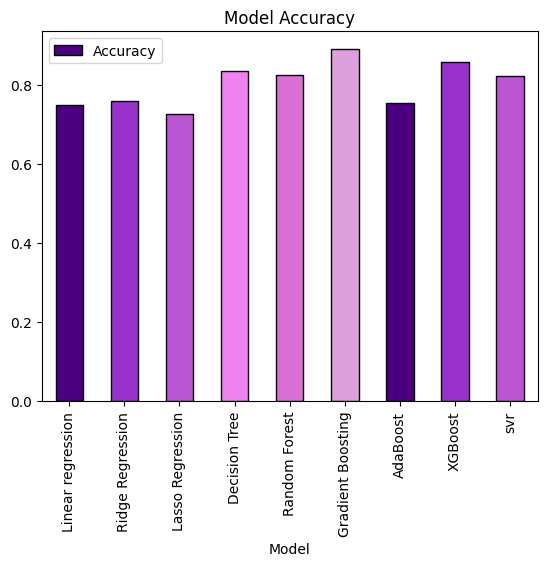

In [ ]:
# MODEL WITH ACCURACY

colors = ["INDIGO", "DARKORCHID", "mediumorchid", "violet", "orchid", "plum"]
model_df.plot.bar(x='Model', y='Accuracy', color = colors, edgecolor ='black')

# Add title
plt.title('Model Accuracy')

# Show plot
plt.show()

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [ ]:
grid_search_xgb = GridSearchCV(XGBoost, param_grid_xgb, cv=5, verbose=2)
grid_search_xgb.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
best_params_xgb = grid_search_xgb.best_params_
print("Best hyperparameters:", best_params_xgb)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


In [ ]:
XGBoost = XGBRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 300)
XGBoost.fit(X_train_scaled, y_train)
final_xgb_y = XGBoost.predict(X_test_scaled)

In [ ]:
final_xgb_accuracy = r2_score(y_test, final_xgb_y)
final_xgb_accuracy

0.9157052302276633

In [ ]:
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [ ]:
grid_search_gb = GridSearchCV(estimator=Gradient_Boosting, param_grid=param_grid_gb, cv=5)
grid_search_gb.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [ ]:
best_params_gb = grid_search_gb.best_params_
print("Best hyperparameters:", best_params_gb)

Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
Gradient_Boosting = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, min_samples_leaf = 1,min_samples_split = 2, n_estimators = 300)
Gradient_Boosting.fit(X_train_scaled, y_train)
final_gb_y = Gradient_Boosting.predict(X_test_scaled)

In [ ]:
final_gb_accuracy = r2_score(y_test, final_gb_y)
final_gb_accuracy

0.8985208438375393

In [ ]:
accuracy_scores = [
    0.749976,
    0.758049,
    0.727212,
    0.872531,
    0.832916,
    0.8962464652601693,
    0.774174,
    0.9157052302276633,
    0.823192
]

In [ ]:
model_name = ["Linear regression", "Ridge Regression", "Lasso Regression", "Decision Tree", "Random Forest", "Gradient_Boosting", "AdaBoost", "XGBoost", "svr"]

In [ ]:
# CREATING NEW DATAFRAME OF MODEL WITH THEIR RESPECTIVE ACCURACY AFTER HYPERPARAMETER TUNING

model_df1 = pd.DataFrame({"Model": model_name, "Accuracy": accuracy_scores})
model_df1

,Model,Accuracy
0,Linear regression,0.749976
1,Ridge Regression,0.758049
2,Lasso Regression,0.727212
3,Decision Tree,0.872531
4,Random Forest,0.832916
5,Gradient_Boosting,0.896246
6,AdaBoost,0.774174
7,XGBoost,0.915705
8,svr,0.823192


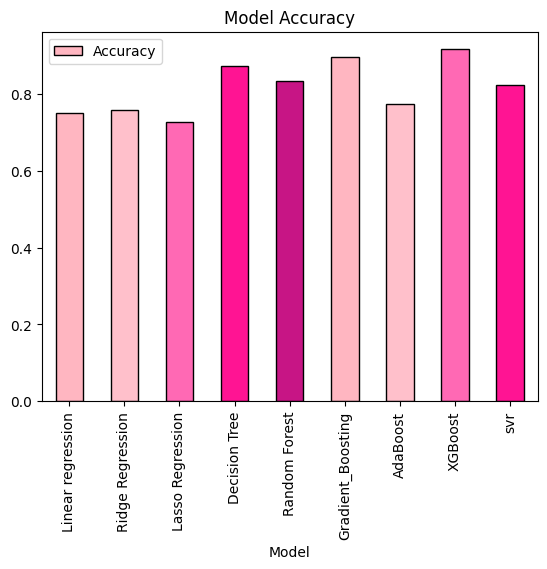

In [ ]:
# MODEL WITH ACCURACY

colors = ['lightpink','pink','hotpink','deeppink','mediumvioletred',]
model_df1.plot.bar(x='Model', y='Accuracy', color = colors, edgecolor = 'black')

# Add title
plt.title('Model Accuracy')

# Show plot
plt.show()


In [ ]:
import pickle

In [ ]:
pickle.dump(XGBoost, open("Groundnut_xgb.pkl", 'wb'))